### 와인 분류

In [3]:
import pandas as pd

# delimiter나 sep로 구분자를 설정해서 read 가능
redwine = pd.read_csv("red_wine.csv",delimiter=';')
redwine['type'] = 0 
whitewine = pd.read_csv("white_wine.csv",delimiter=';')
whitewine['type'] = 1
wine = pd.concat([redwine, whitewine])
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [13]:
X = wine.iloc[:, :-1]
Y = wine['type']
X.shape, Y.shape

((6497, 12), (6497,))

In [25]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X, 
    Y, 
    random_state = 0, 
    test_size=0.25, 
    stratify=Y
)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000).fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

(0.9844006568144499, 0.9852307692307692)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier().fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

(0.9568965517241379, 0.9501538461538461)

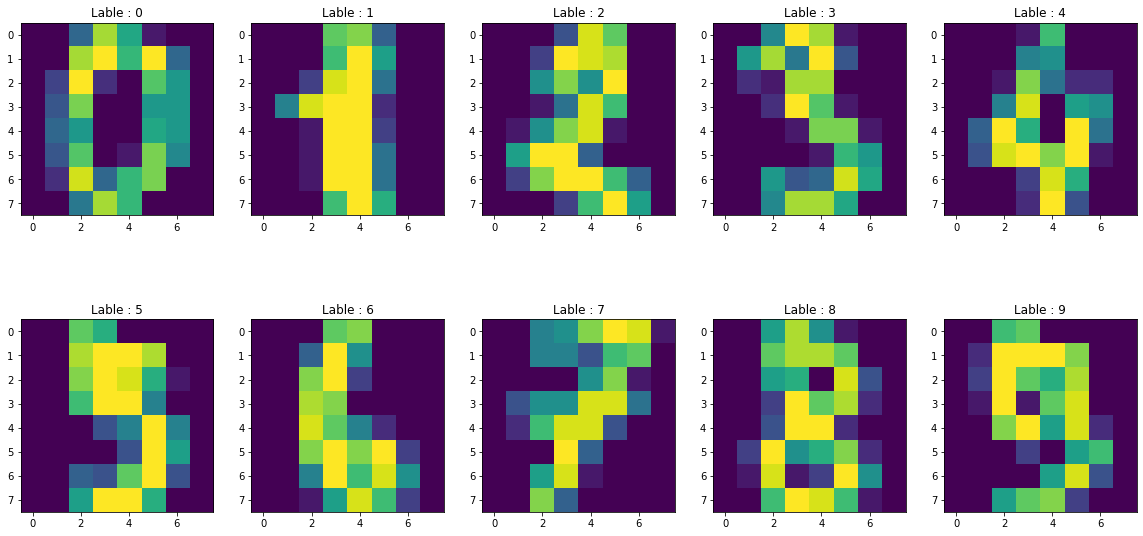

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

plt.figure(figsize=(20, 10))
for index, image in enumerate(digits['images'][:10]):
    plt.subplot(2, 5, index+1)
    plt.imshow(image)
    plt.title(f'Lable : {digits.target[index]}')
plt.show()

In [28]:
type(digits['images'])

numpy.ndarray

In [29]:
digits['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits['data'],
                                                   digits['target'],
                                                   stratify=digits['target'],
                                                   random_state=0 )
model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9644444444444444)